# Laboratorio 7
### Alexa Bravo, Amado Garcia, Sara Zavala

## Preprocesamiento

In [244]:
import pprint
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
from sklearn import *
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

In [2]:
#Mostrar cuantos ejemplares hay por cada familia

In [3]:
path = ("C:/Users\sarit\Desktop\lab7sds\malimg_paper_dataset_imgs")

In [4]:
path_images = ImageDataGenerator().flow_from_directory(directory=path, target_size=(128,128), batch_size=10000)

Found 9339 images belonging to 25 classes.


In [5]:
path_images.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

In [6]:
data = path_images.class_indices
data2 = list(data.values())
print(len(data2)-1)

24


In [9]:
images, marks = next(path_images)

In [10]:
images.shape

(9339, 128, 128, 3)

In [11]:
images.size

459030528

In [12]:
marks.size

233475

In [13]:
print(images.itemsize)
print(marks.itemsize)

4
4


In [14]:
#indices_1 = images.class_indices

In [15]:
# Plotee las imágenes de los ejemplares de malware. 

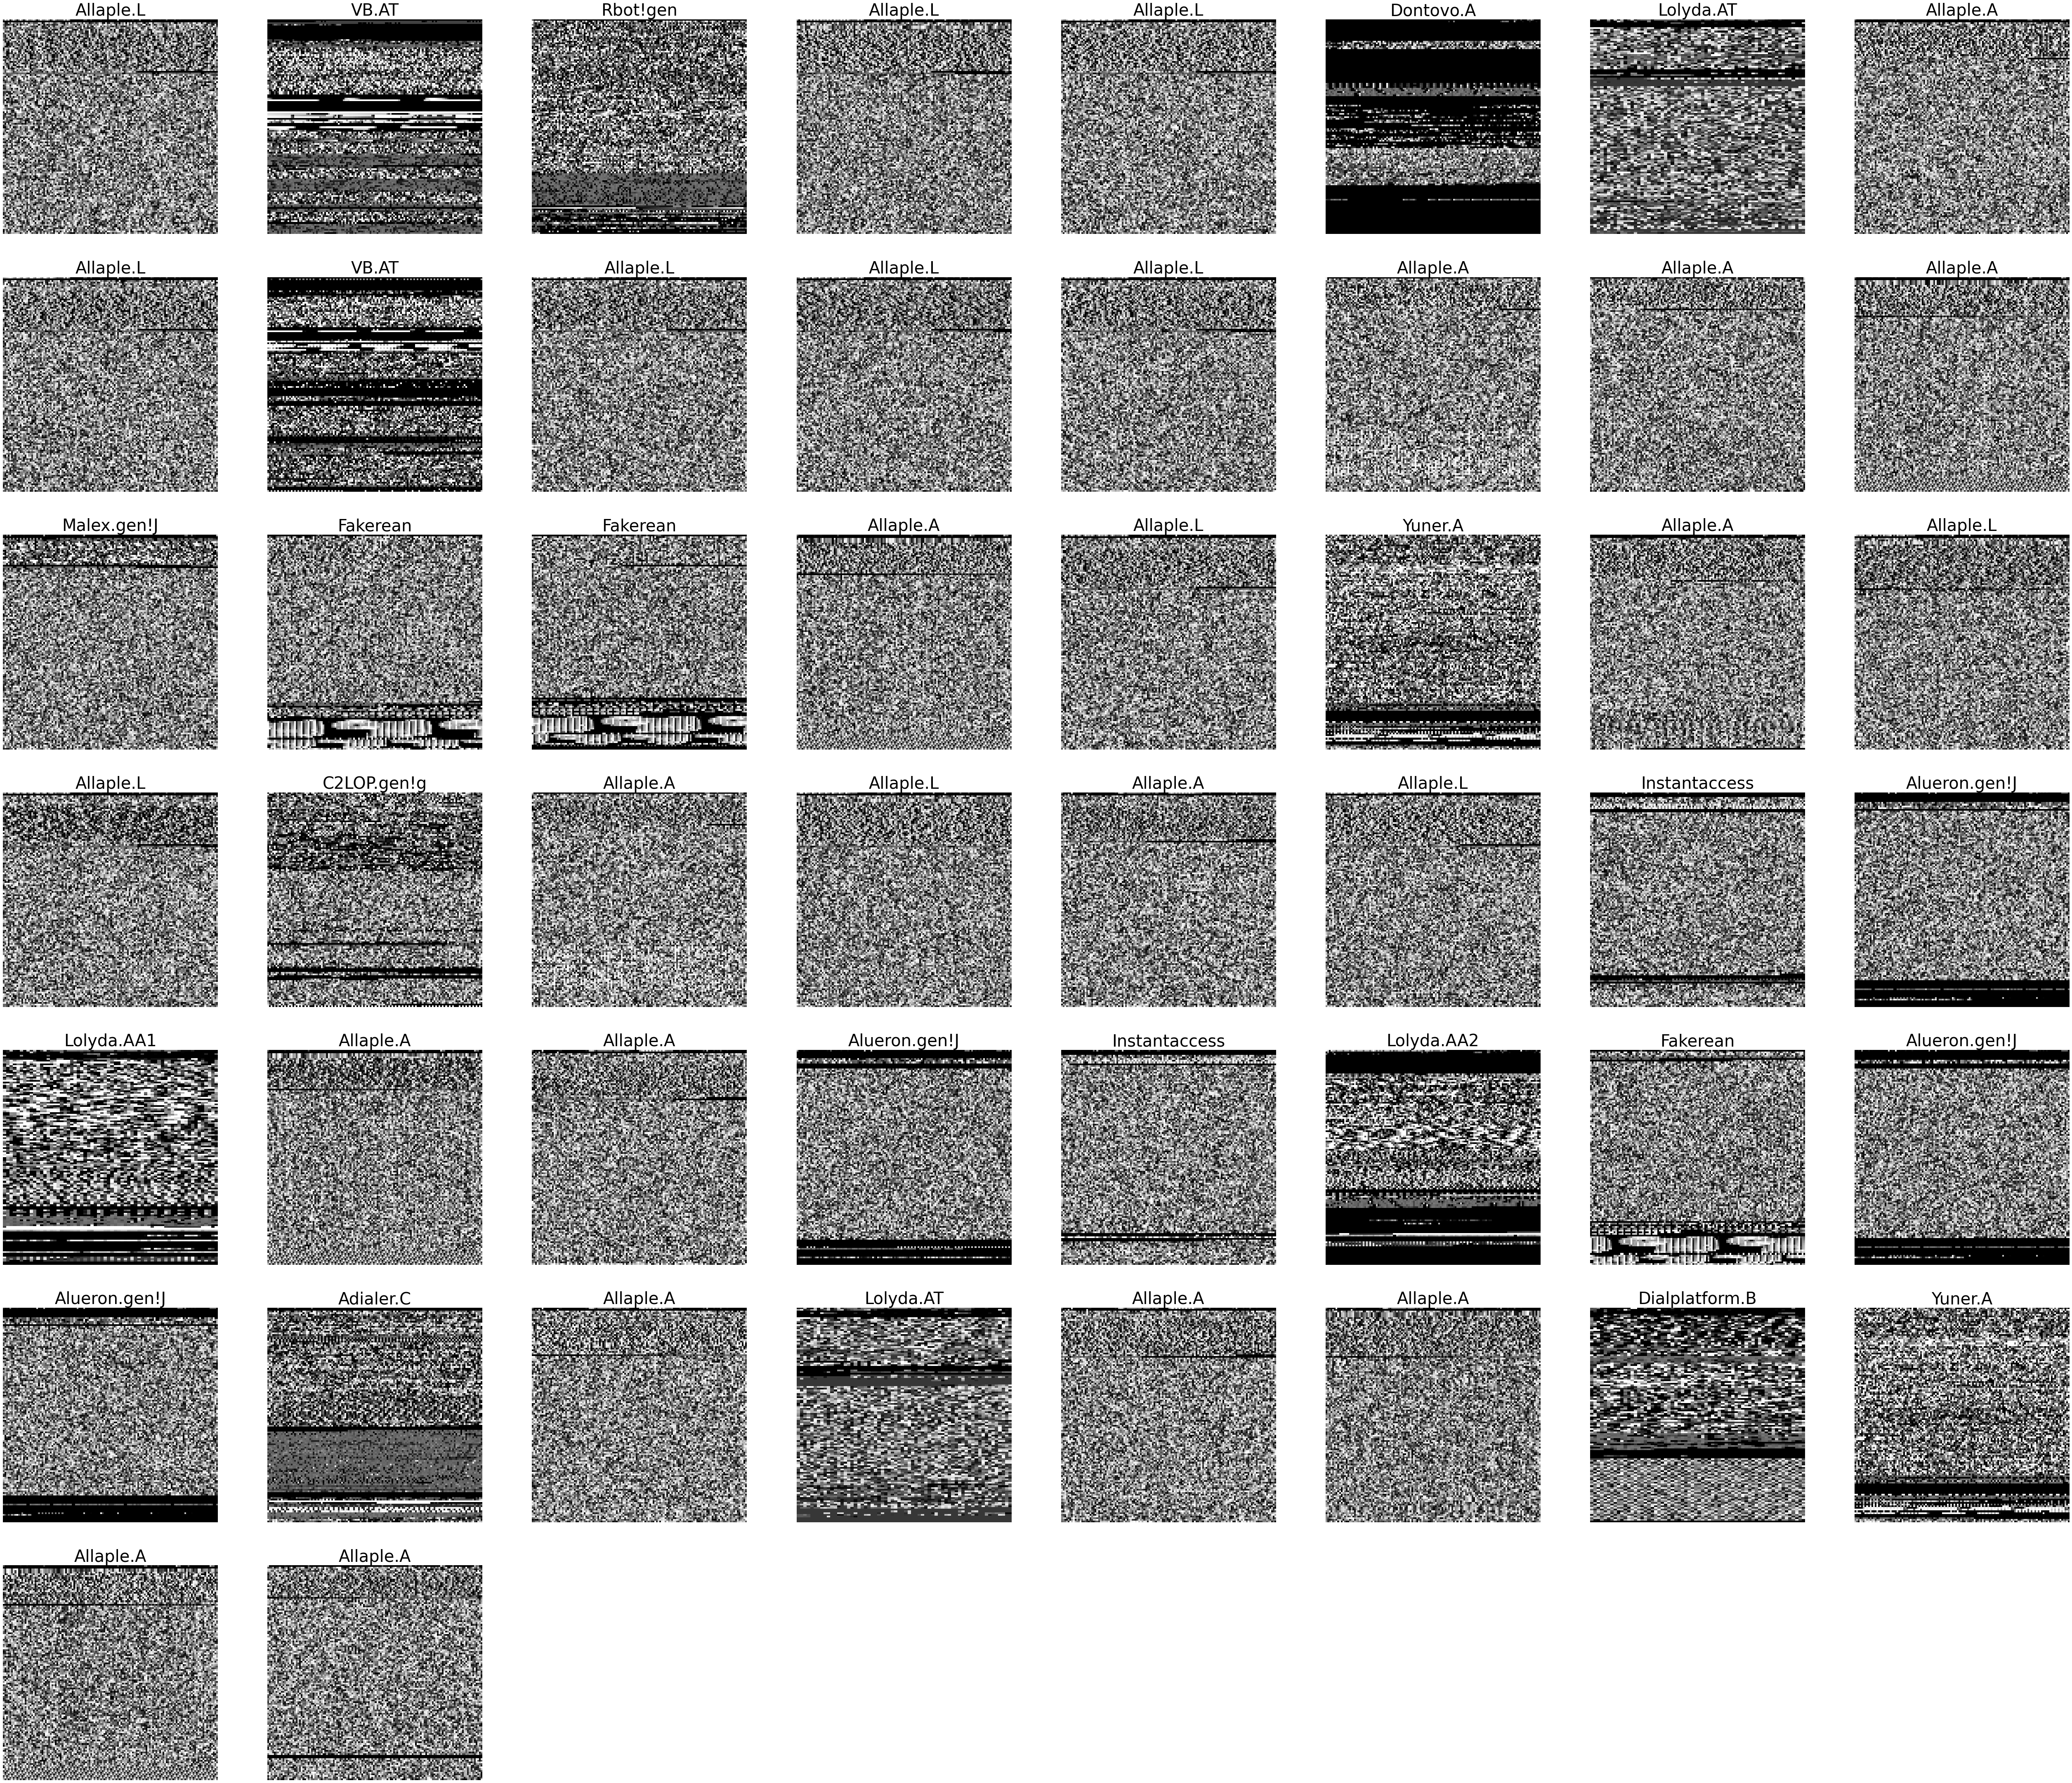

In [33]:
flag = False
img = np.array(images).astype(np.uint8)
fig = plt.figure(figsize=(90,90))
for i in range (0,50):
    new_plot = fig.add_subplot(8,8, i+1)
    new_plot.axis("Off")
    if marks is not None:
        new_plot.set_title(list(path_images.class_indices.keys())[np.argmax(marks[i])], fontsize=40)
    plt.imshow(img[i], interpolation=None if flag else 'none')

### Graficas familias

In [39]:
indices_path = path_images.class_indices

In [40]:
type_images = indices_path.keys()

In [57]:
for x in marks.shape:
    print(x)

9339
25


In [60]:
add = sum(marks)
marks_qt = marks.shape[0]

In [62]:
quantity = ((add)/marks_qt)

In [63]:
quantity = quantity*100
quantity

array([ 1.3063496 ,  1.2421031 , 31.577257  , 17.036085  ,  2.1201413 ,
        1.1350251 ,  1.5633365 ,  2.141557  ,  1.895278  ,  1.7346611 ,
        4.079666  ,  4.615055  ,  2.2807581 ,  1.9702322 ,  1.3170575 ,
        1.7025378 ,  1.4562588 ,  1.5205053 ,  1.6918299 ,  0.85662276,
        1.3705964 ,  1.4134276 ,  4.3687763 ,  1.038655  ,  8.566228  ],
      dtype=float32)

In [99]:
# def gradient_image(ax, extent, direction=0.3, cmap_range=(0, 1), **kwargs):
#     """
#     Draw a gradient image based on a colormap.

#     Parameters
#     ----------
#     ax : Axes
#         The axes to draw on.
#     extent
#         The extent of the image as (xmin, xmax, ymin, ymax).
#         By default, this is in Axes coordinates but may be
#         changed using the *transform* keyword argument.
#     direction : float
#         The direction of the gradient. This is a number in
#         range 0 (=vertical) to 1 (=horizontal).
#     cmap_range : float, float
#         The fraction (cmin, cmax) of the colormap that should be
#         used for the gradient, where the complete colormap is (0, 1).
#     **kwargs
#         Other parameters are passed on to `.Axes.imshow()`.
#         In particular useful is *cmap*.
#     """
#     phi = direction * np.pi / 2
#     v = np.array([np.cos(phi), np.sin(phi)])
#     X = np.array([[v @ [1, 0], v @ [1, 1]],
#                   [v @ [0, 0], v @ [0, 1]]])
#     a, b = cmap_range
#     X = a + (b - a) / X.max() * X
#     im = ax.imshow(X, extent=extent, interpolation='bicubic',
#                    vmin=0, vmax=1, **kwargs)
#     return im

<BarContainer object of 25 artists>

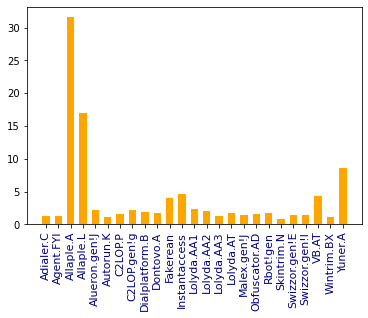

In [102]:
plt.xticks(rotation='vertical', color='navy', fontsize=11)
plt.bar(type_images,quantity,color='orange',width=0.6)

### Dividir data en 70/30

In [71]:
#Esto se hace como el el lab1 va?
#Dividir data
X_train, X_test, y_train, y_test = train_test_split(images/255.,marks, test_size=0.3)

In [107]:
# ---- TRAIN
X_train.shape

(6537, 128, 128, 3)

In [111]:
X_train.size

321306624

In [108]:
# ---- TEST
X_test.shape

(2802, 128, 128, 3)

In [112]:
X_test.size

137723904

In [109]:
# ----- TRAIN
y_train.shape

(6537, 25)

In [113]:
y_train.size

163425

In [110]:
# ----- TEST
y_test.shape

(2802, 25)

In [114]:
y_test.size

70050

In [123]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (5, 5), input_shape=(128, 128, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(25, activation='softmax'))

In [124]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 460800)           

In [127]:
model.layers

In [146]:
print(model.optimizer)

In [147]:
print(model.metrics)

[<keras.metrics.Mean object at 0x000001E2B7FD1BB0>, <keras.metrics.MeanMetricWrapper object at 0x000001E2BF18D850>]


In [158]:
# Compile
# https://faroit.com/keras-docs/2.1.3/models/sequential/
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [162]:
# Comprobacion sobre conjunto de prueba
op = model.evaluate(X_test, y_test)
print("Exactitud -->", op[1])

88/88 [==============================] - 14s 162ms/step - loss: 3.2435 - accuracy: 0.0200
Exactitud --> 0.019985724240541458


In [166]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4)

Epoch 1/4
205/205 [==============================] - 159s 775ms/step - loss: 0.0727 - accuracy: 0.9786 - val_loss: 0.2794 - val_accuracy: 0.9311
Epoch 2/4
205/205 [==============================] - 155s 757ms/step - loss: 0.0543 - accuracy: 0.9833 - val_loss: 0.0948 - val_accuracy: 0.9679
Epoch 3/4
205/205 [==============================] - 177s 864ms/step - loss: 0.0429 - accuracy: 0.9868 - val_loss: 0.0889 - val_accuracy: 0.9697
Epoch 4/4
205/205 [==============================] - 161s 785ms/step - loss: 0.0382 - accuracy: 0.9875 - val_loss: 0.0893 - val_accuracy: 0.9707


In [171]:
type_images

dict_keys(['Adialer.C', 'Agent.FYI', 'Allaple.A', 'Allaple.L', 'Alueron.gen!J', 'Autorun.K', 'C2LOP.P', 'C2LOP.gen!g', 'Dialplatform.B', 'Dontovo.A', 'Fakerean', 'Instantaccess', 'Lolyda.AA1', 'Lolyda.AA2', 'Lolyda.AA3', 'Lolyda.AT', 'Malex.gen!J', 'Obfuscator.AD', 'Rbot!gen', 'Skintrim.N', 'Swizzor.gen!E', 'Swizzor.gen!I', 'VB.AT', 'Wintrim.BX', 'Yuner.A'])

In [172]:
quantity

array([ 1.3063496 ,  1.2421031 , 31.577257  , 17.036085  ,  2.1201413 ,
        1.1350251 ,  1.5633365 ,  2.141557  ,  1.895278  ,  1.7346611 ,
        4.079666  ,  4.615055  ,  2.2807581 ,  1.9702322 ,  1.3170575 ,
        1.7025378 ,  1.4562588 ,  1.5205053 ,  1.6918299 ,  0.85662276,
        1.3705964 ,  1.4134276 ,  4.3687763 ,  1.038655  ,  8.566228  ],
      dtype=float32)

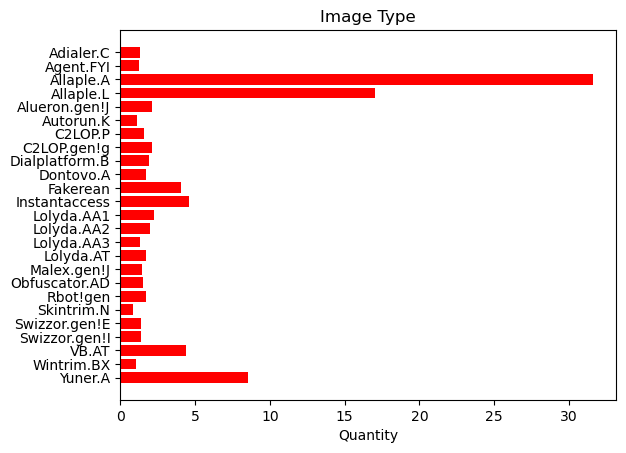

In [191]:
plt.rcdefaults()
fig, ax = plt.subplots()


ax.barh(list(type_images),list(quantity), align='center', color='red')
ax.set_yticks(list(type_images))
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Quantity')
ax.set_title('Image Type')


plt.show()

In [231]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
y_pred=model.predict(X_test)

In [232]:
test_predict = np.argmax(model.predict(X_test), axis=-1)

In [233]:
target_test = np.argmax(y_test, axis=-1)

In [234]:
matriz_confusion_con_heat = confusion_matrix(target_test, test_predict)

Text(0.5, 1.0, 'matriz_confusion_con_heat')

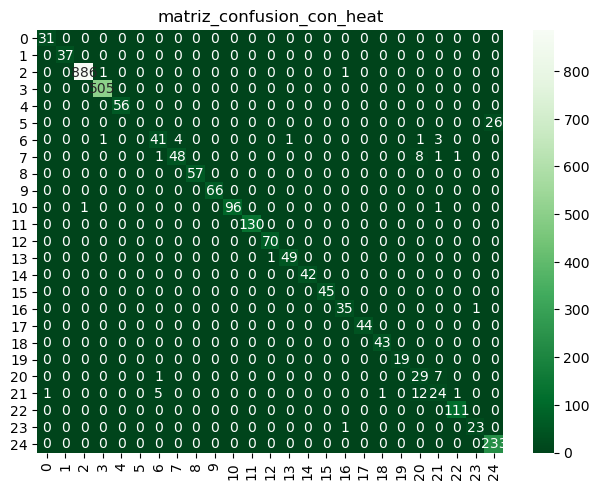

In [237]:
# Pruebas con matriz de confusion
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# --------------------------
sns.heatmap(pd.DataFrame(matriz_confusion_con_heat), annot=True, cmap = "Greens_r" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('matriz_confusion_con_heat')


In [240]:
print(confusion_matrix(test_predict, target_test))

[[ 31   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   1   0   0   0]
 [  0  37   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0 886   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   1 505   0   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0  56   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  41   1   0   0   0   0   0   0   0   0   0   0
    0   0   1   5   0   0   0]
 [  0   0   0   0   0   0   4  48   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  57   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  66   0   0   0  

In [242]:
print(classification_report(test_predict, target_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00       887
           3       1.00      1.00      1.00       507
           4       1.00      1.00      1.00        56
           5       0.00      0.00      0.00         0
           6       0.80      0.85      0.83        48
           7       0.81      0.92      0.86        52
           8       1.00      1.00      1.00        57
           9       1.00      1.00      1.00        66
          10       0.98      1.00      0.99        96
          11       1.00      1.00      1.00       130
          12       1.00      0.99      0.99        71
          13       0.98      0.98      0.98        50
          14       1.00      1.00      1.00        42
          15       1.00      1.00      1.00        45
          16       0.97      0.95      0.96        37
          17       1.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [245]:
print("Validation accuracy", metrics.accuracy_score(test_predict, target_test))

Validation accuracy 0.9707351891506067


In [ ]:
##Fin